Shape: (10, 10)
   Age Attrition Department  MonthlyIncome             JobRole  \
0   34       Yes      Sales           4500     Sales Executive   
1   28        No        R&D           6200  Research Scientist   
2   45        No         HR           3800        HR Executive   
3   29       Yes        R&D           5000  Research Scientist   
4   41        No      Sales           7200     Sales Executive   

   TotalWorkingYears  YearsAtCompany OverTime  Education  WorkLifeBalance  
0                 10               5      Yes          3                2  
1                  5               2       No          4                3  
2                 20              15       No          2                4  
3                  4               3      Yes          3                2  
4                 12               7       No          4                3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column             Non-N

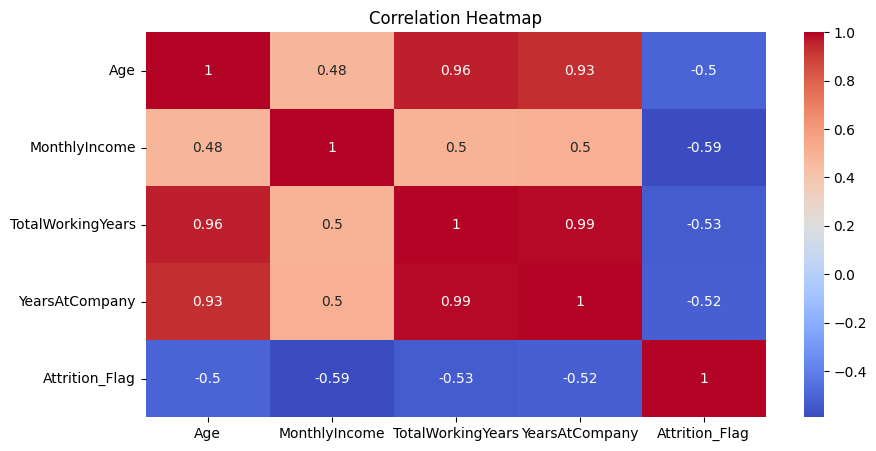


Attrition by Tenure Bucket:
   TenureBucket  Attrition_Flag
0      0-2 yrs            0.50
1      2-5 yrs            0.75
2     5-10 yrs            0.00
3    10-20 yrs            0.00
Clean file exported: HR_Attrition_Clean_For_PowerBI.csv


/tmp/ipython-input-2679281716.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_attr = df.groupby("TenureBucket")['Attrition_Flag'].mean().reset_index()


In [1]:
# HR ATTRITION ANALYSIS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("HR_Attrition_Sample.csv")


# BASIC INFO
print("Shape:", df.shape)
print(df.head())
print(df.info())


# BASIC CLEANING

df['Attrition_Flag'] = df['Attrition'].map({"Yes":1, "No":0})


# OVERALL ATTRITION RATE

attrition_rate = df['Attrition_Flag'].mean() * 100
print("Overall Attrition Rate:", round(attrition_rate, 2), "%")

# ATTRITION BY DEPARTMENT

dept_attr = df.groupby("Department")['Attrition_Flag'].mean().reset_index()
print("\nAttrition by Department:\n", dept_attr)


# ATTRITION BY JOB ROLE

job_attr = df.groupby("JobRole")['Attrition_Flag'].mean().reset_index()
print("\nAttrition by Job Role:\n", job_attr)


# ATTRITION BY OVERTIME

ot_attr = df.groupby("OverTime")['Attrition_Flag'].mean().reset_index()
print("\nAttrition by OverTime:\n", ot_attr)


# ATTRITION BY WORK-LIFE BALANCE

wlb_attr = df.groupby("WorkLifeBalance")['Attrition_Flag'].mean().reset_index()
print("\nAttrition by Work-Life Balance:\n", wlb_attr)


# CORRELATION HEATMAP
plt.figure(figsize=(10,5))
sns.heatmap(df[['Age','MonthlyIncome','TotalWorkingYears','YearsAtCompany','Attrition_Flag']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# TENURE BUCKETS
df['TenureBucket'] = pd.cut(df['YearsAtCompany'],
                            bins=[0,2,5,10,20],
                            labels=["0-2 yrs","2-5 yrs","5-10 yrs","10-20 yrs"])

tenure_attr = df.groupby("TenureBucket")['Attrition_Flag'].mean().reset_index()
print("\nAttrition by Tenure Bucket:\n", tenure_attr)


# EXPORT CLEAN FILE FOR POWER BI
df.to_csv("HR_Attrition_Clean_For_PowerBI.csv", index=False)
print("Clean file exported: HR_Attrition_Clean_For_PowerBI.csv")
